In [2]:
import sys 
import os
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.autograd as autograd
#sys.path.append(os.path.abspath("/mnt/home/yjo10/ceph/CAMELS/ST_DMO/MINE/"))
import matplotlib.pyplot as plt
import seaborn as sns
import pywph as pw
from scipy import stats
sys.path.append(os.path.abspath("../utils/"))
from wph_utils import WPH
sns.set()

## Density Maps

In [5]:
gmap = np.zeros((15*100,256,256))
for i in range(100):
    fgmap = "/mnt/ceph/users/fvillaescusa/Yongseok/Gadget_sims_mirrror_Ramses/images/Images_M_Gadget_mirror_Ramses_LH_{}_z=0.00.npy".format(i)
    gmap[i*15:(i+1)*15,:,:] = np.load(fgmap)
frmap = "/mnt/ceph/users/fvillaescusa/Nbody_systematics/data/maps/maps_Ramses/Images_M_Ramses_LH_z=0.00.npy"
rmap = np.load(frmap)

### Plots for maps

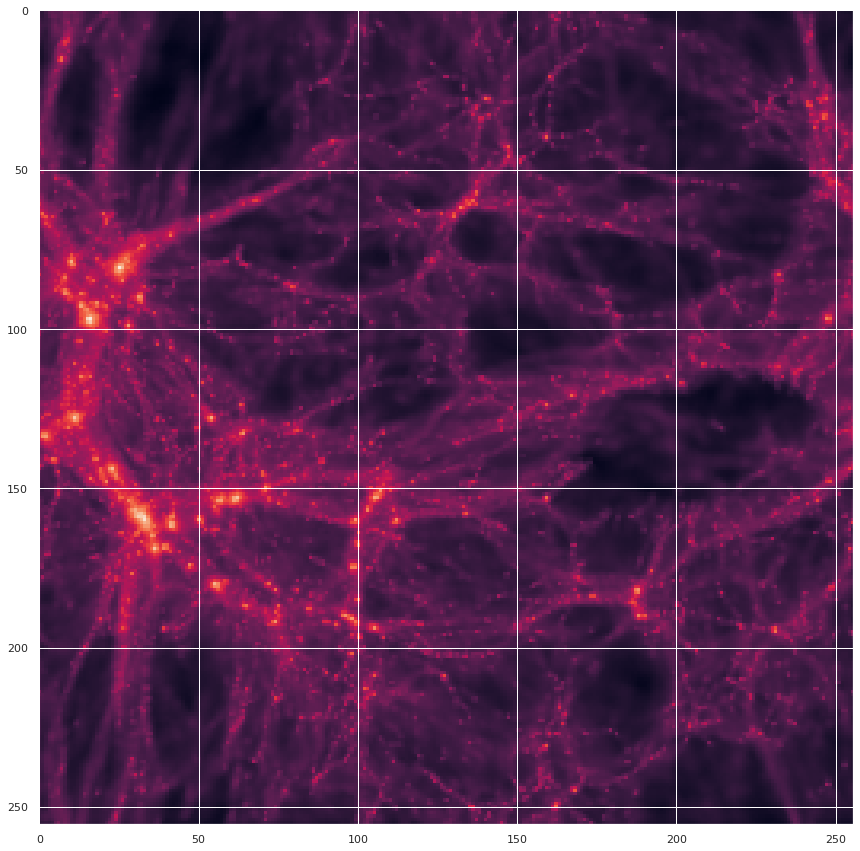

In [3]:
plt.figure(figsize=(15,15))
plt.imshow(np.log10(gmap[0,:]))

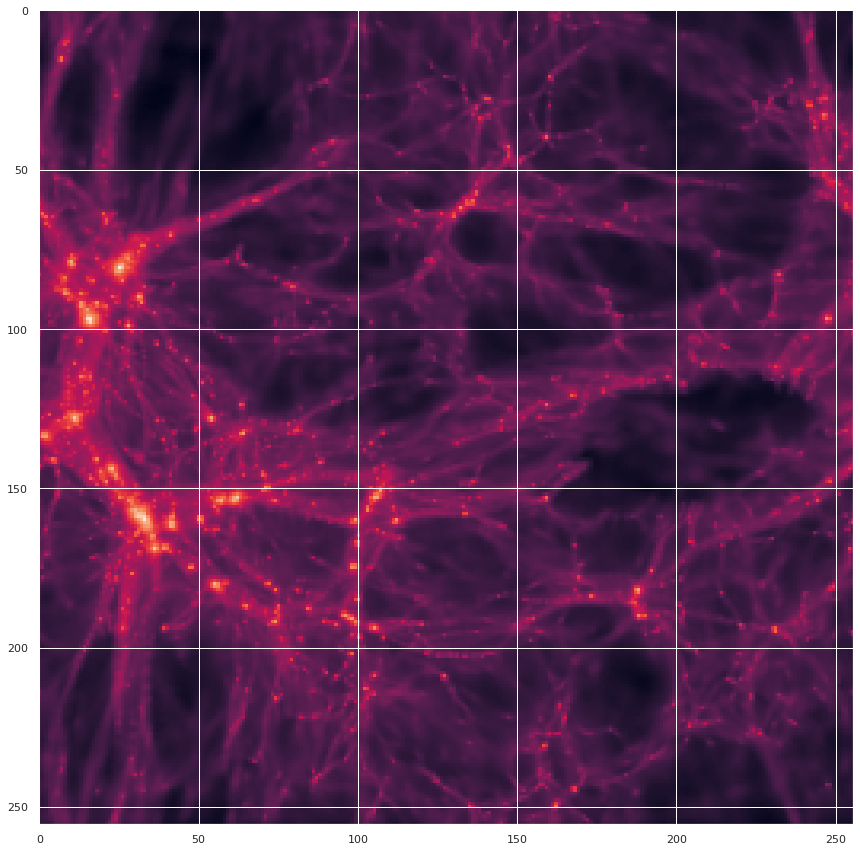

In [4]:
plt.figure(figsize=(15,15))
plt.imshow(np.log10(rmap[0,:]))

## Phase Harmonics Scattering Transform

### Examples

In [11]:
sys.path.append(os.path.abspath("/mnt/home/yjo10/ceph/myutils/"))
from imp import reload 
from wph_utils import WPH
import wph_utils
# Change in mymodule/'
reload(wph_utils)
import plt_utils
from plt_utils import generateAxesForMultiplePlots
import plt_utils
# Change in mymodule/'
reload(plt_utils)

<module 'plt_utils' from '/mnt/home/yjo10/ceph/myutils/plt_utils.py'>

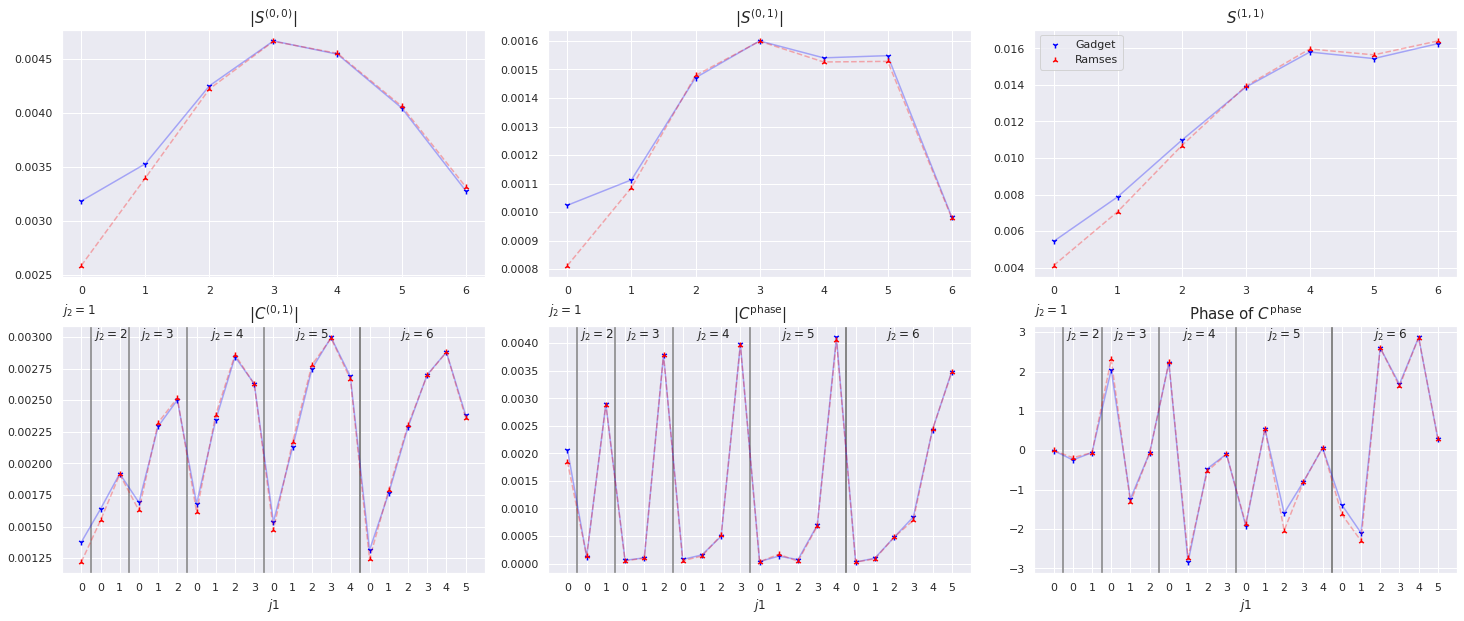

In [74]:
J = 7; L = 4; dn = 0; i = 0
wph_gadget = WPH(data=np.log(gmap[i,:]),shape=(256, 256), J=J, L=L, dn=dn,device=0)
wph_ramses = WPH(data=np.log(rmap[i,:]),shape=(256, 256), J=J, L=L, dn=dn,device=0)
gcoefs, gmodes = wph_gadget.getAllIsoCoeffs()
rcoefs, rmodes = wph_ramses.getAllIsoCoeffs()


axes = generateAxesForMultiplePlots(shape=(3,2),figsize=(25,10),wspace=0.15,hspace=0.2)
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif']  = 'Times'
zorder = 10; alpha=0.3
titles = ["$|S^{(0,0)}|$","$|S^{(0,1)}|$","$S^{(1,1)}$","$|C^{(0,1)}|$","$|C^\mathrm{phase}|$",]
for i, name in enumerate(wph_gadget.getCoefNames()):
    x = i % 3; y = i // 3
    X = np.absolute(gcoefs[name])
    axes[x,y].plot(range(X.shape[0]),X,c="blue",ls="-",alpha=alpha,zorder=zorder)
    axes[x,y].scatter(range(X.shape[0]),X,c="blue",marker='1',zorder=zorder, label="Gadget")
    X = np.absolute(rcoefs[name])
    axes[x,y].plot(range(X.shape[0]),X,c="red",ls="--",alpha=alpha,zorder=zorder)
    axes[x,y].scatter(range(X.shape[0]),X,c="red",marker='2',zorder=zorder, label="Ramses")
    axes[x,y].set_title(titles[i], fontsize=15)
axes[2,0].legend()
## Phase (angle of complex)
x=2;y=1;
X = np.angle(gcoefs[name])
axes[x,y].plot(range(X.shape[0]),X,c="blue",ls="-",alpha=alpha,zorder=zorder)
axes[x,y].scatter(range(X.shape[0]),X,c="blue",marker='1',zorder=zorder)
X = np.angle(rcoefs[name])
axes[x,y].plot(range(X.shape[0]),X,c="red",ls="--",alpha=alpha,zorder=zorder)
axes[x,y].scatter(range(X.shape[0]),X,c="red",marker='2',zorder=zorder)
axes[x,y].set_title("Phase of $C^\mathrm{phase}$", fontsize=15)

for i in range(3):
    #j1  = [-0.3,5.5,10.5,14.5,17.5,19.5]
    j1  = [0.5, 2.5, 5.5, 9.5, 14.5,14.5]
    j2  = list(range(1,7))
    pos = [[0.0,1.1],[0.075,1.00],[0.185,1.00],
           [0.35,1.00],[0.55,1.00],[0.8,1.00]];
    for j, jj in enumerate(j1):
        axes[i,1].axvline(x=jj,c="grey",zorder=1)
        axes[i,1].text(*pos[j],"$j_2=${}".format(j2[j]),transform=axes[i,1].transAxes,
                       verticalalignment='top', horizontalalignment='left')
    axes[i,1].set_xticks(list(range(X.shape[0])))
    axes[i,1].set_xticklabels([0,0,1,0,1,2,0,1,2,3,0,1,2,3,4,0,1,2,3,4,5])
    axes[i,1].set_xlabel("$j1$")   
plt.savefig("g_r.png",dpi=400)

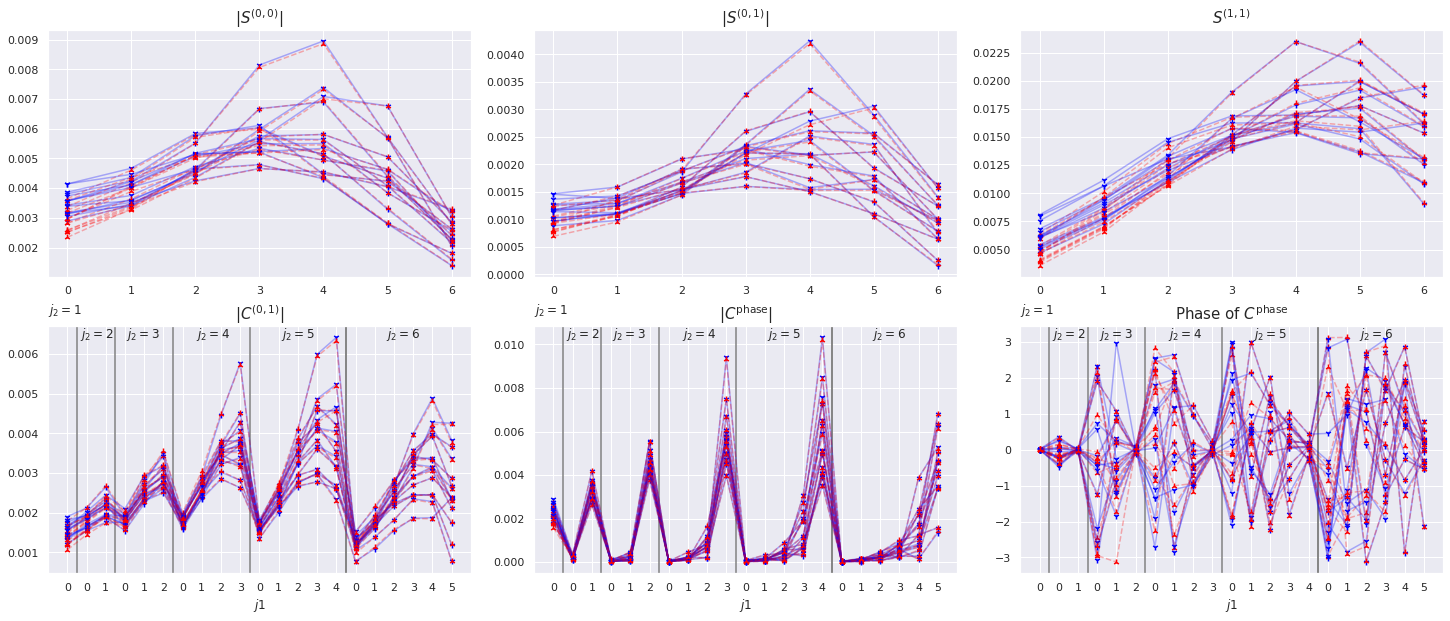

In [15]:
J = 7; L = 4; dn = 0; i = 1; N = 15
wph_gadget = WPH(data=np.log(gmap[:N,:]),shape=(256, 256), J=J, L=L, dn=dn,device=0)
wph_ramses = WPH(data=np.log(rmap[:N,:]),shape=(256, 256), J=J, L=L, dn=dn,device=0)
gcoefs, gmodes = wph_gadget.getAllIsoCoeffs()
rcoefs, rmodes = wph_ramses.getAllIsoCoeffs()


axes = generateAxesForMultiplePlots(shape=(3,2),figsize=(25,10),wspace=0.15,hspace=0.2)
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif']  = 'Times'
zorder = 10; alpha=0.3
titles = ["$|S^{(0,0)}|$","$|S^{(0,1)}|$","$S^{(1,1)}$","$|C^{(0,1)}|$","$|C^\mathrm{phase}|$",]
for n in range(N):
    for i, name in enumerate(wph_gadget.getCoefNames()):
        x = i % 3; y = i // 3
        X = np.absolute(gcoefs[name][n])
        axes[x,y].plot(range(X.shape[0]),X,c="blue",ls="-",alpha=alpha,zorder=zorder)
        axes[x,y].scatter(range(X.shape[0]),X,c="blue",marker='1',zorder=zorder, label="Gadget")
        X = np.absolute(rcoefs[name][n])
        axes[x,y].plot(range(X.shape[0]),X,c="red",ls="--",alpha=alpha,zorder=zorder)
        axes[x,y].scatter(range(X.shape[0]),X,c="red",marker='2',zorder=zorder, label="Ramses")
        axes[x,y].set_title(titles[i], fontsize=15)
    #axes[2,0].legend()
    ## Phase (angle of complex)
    x=2;y=1;
    X = np.angle(gcoefs[name][n])
    axes[x,y].plot(range(X.shape[0]),X,c="blue",ls="-",alpha=alpha,zorder=zorder)
    axes[x,y].scatter(range(X.shape[0]),X,c="blue",marker='1',zorder=zorder)
    X = np.angle(rcoefs[name][n])
    axes[x,y].plot(range(X.shape[0]),X,c="red",ls="--",alpha=alpha,zorder=zorder)
    axes[x,y].scatter(range(X.shape[0]),X,c="red",marker='2',zorder=zorder)
    axes[x,y].set_title("Phase of $C^\mathrm{phase}$", fontsize=15)

for i in range(3):
    #j1  = [-0.3,5.5,10.5,14.5,17.5,19.5]
    j1  = [0.5, 2.5, 5.5, 9.5, 14.5,14.5]
    j2  = list(range(1,7))
    pos = [[0.0,1.1],[0.075,1.00],[0.185,1.00],
           [0.35,1.00],[0.55,1.00],[0.8,1.00]];
    for j, jj in enumerate(j1):
        axes[i,1].axvline(x=jj,c="grey",zorder=1)
        axes[i,1].text(*pos[j],"$j_2=${}".format(j2[j]),transform=axes[i,1].transAxes,
                       verticalalignment='top', horizontalalignment='left')
    axes[i,1].set_xticks(list(range(X.shape[0])))
    axes[i,1].set_xticklabels([0,0,1,0,1,2,0,1,2,3,0,1,2,3,4,0,1,2,3,4,5])
    axes[i,1].set_xlabel("$j1$")   

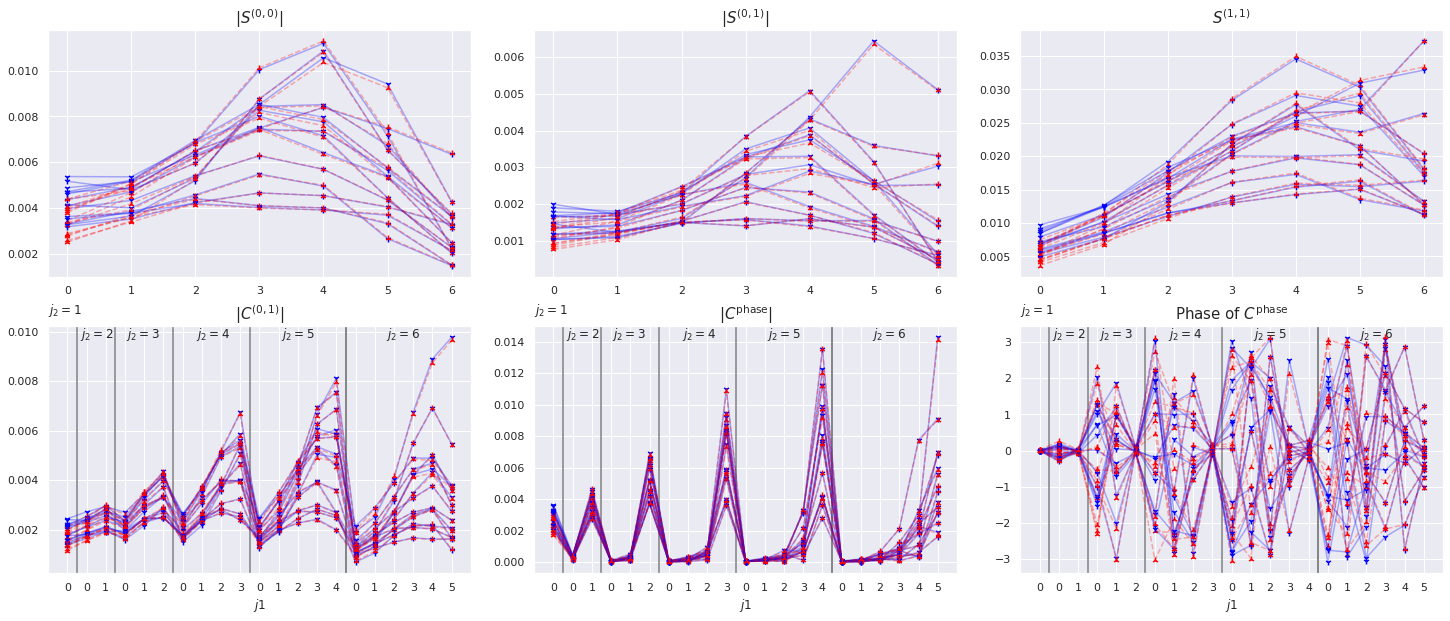

In [16]:
J = 7; L = 4; dn = 0; i = 1; N = 15
wph_gadget = WPH(data=np.log(gmap[:15*N:15,:]),shape=(256, 256), J=J, L=L, dn=dn,device=0)
wph_ramses = WPH(data=np.log(rmap[:15*N:15,:]),shape=(256, 256), J=J, L=L, dn=dn,device=0)
gcoefs, gmodes = wph_gadget.getAllIsoCoeffs()
rcoefs, rmodes = wph_ramses.getAllIsoCoeffs()


axes = generateAxesForMultiplePlots(shape=(3,2),figsize=(25,10),wspace=0.15,hspace=0.2)
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif']  = 'Times'
zorder = 10; alpha=0.3
titles = ["$|S^{(0,0)}|$","$|S^{(0,1)}|$","$S^{(1,1)}$","$|C^{(0,1)}|$","$|C^\mathrm{phase}|$",]
for n in range(N):
    for i, name in enumerate(wph_gadget.getCoefNames()):
        x = i % 3; y = i // 3
        X = np.absolute(gcoefs[name][n])
        axes[x,y].plot(range(X.shape[0]),X,c="blue",ls="-",alpha=alpha,zorder=zorder)
        axes[x,y].scatter(range(X.shape[0]),X,c="blue",marker='1',zorder=zorder, label="Gadget")
        X = np.absolute(rcoefs[name][n])
        axes[x,y].plot(range(X.shape[0]),X,c="red",ls="--",alpha=alpha,zorder=zorder)
        axes[x,y].scatter(range(X.shape[0]),X,c="red",marker='2',zorder=zorder, label="Ramses")
        axes[x,y].set_title(titles[i], fontsize=15)
    #axes[2,0].legend()
    ## Phase (angle of complex)
    x=2;y=1;
    X = np.angle(gcoefs[name][n])
    axes[x,y].plot(range(X.shape[0]),X,c="blue",ls="-",alpha=alpha,zorder=zorder)
    axes[x,y].scatter(range(X.shape[0]),X,c="blue",marker='1',zorder=zorder)
    X = np.angle(rcoefs[name][n])
    axes[x,y].plot(range(X.shape[0]),X,c="red",ls="--",alpha=alpha,zorder=zorder)
    axes[x,y].scatter(range(X.shape[0]),X,c="red",marker='2',zorder=zorder)
    axes[x,y].set_title("Phase of $C^\mathrm{phase}$", fontsize=15)

for i in range(3):
    #j1  = [-0.3,5.5,10.5,14.5,17.5,19.5]
    j1  = [0.5, 2.5, 5.5, 9.5, 14.5,14.5]
    j2  = list(range(1,7))
    pos = [[0.0,1.1],[0.075,1.00],[0.185,1.00],
           [0.35,1.00],[0.55,1.00],[0.8,1.00]];
    for j, jj in enumerate(j1):
        axes[i,1].axvline(x=jj,c="grey",zorder=1)
        axes[i,1].text(*pos[j],"$j_2=${}".format(j2[j]),transform=axes[i,1].transAxes,
                       verticalalignment='top', horizontalalignment='left')
    axes[i,1].set_xticks(list(range(X.shape[0])))
    axes[i,1].set_xticklabels([0,0,1,0,1,2,0,1,2,3,0,1,2,3,4,0,1,2,3,4,5])
    axes[i,1].set_xlabel("$j1$")   

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: Times


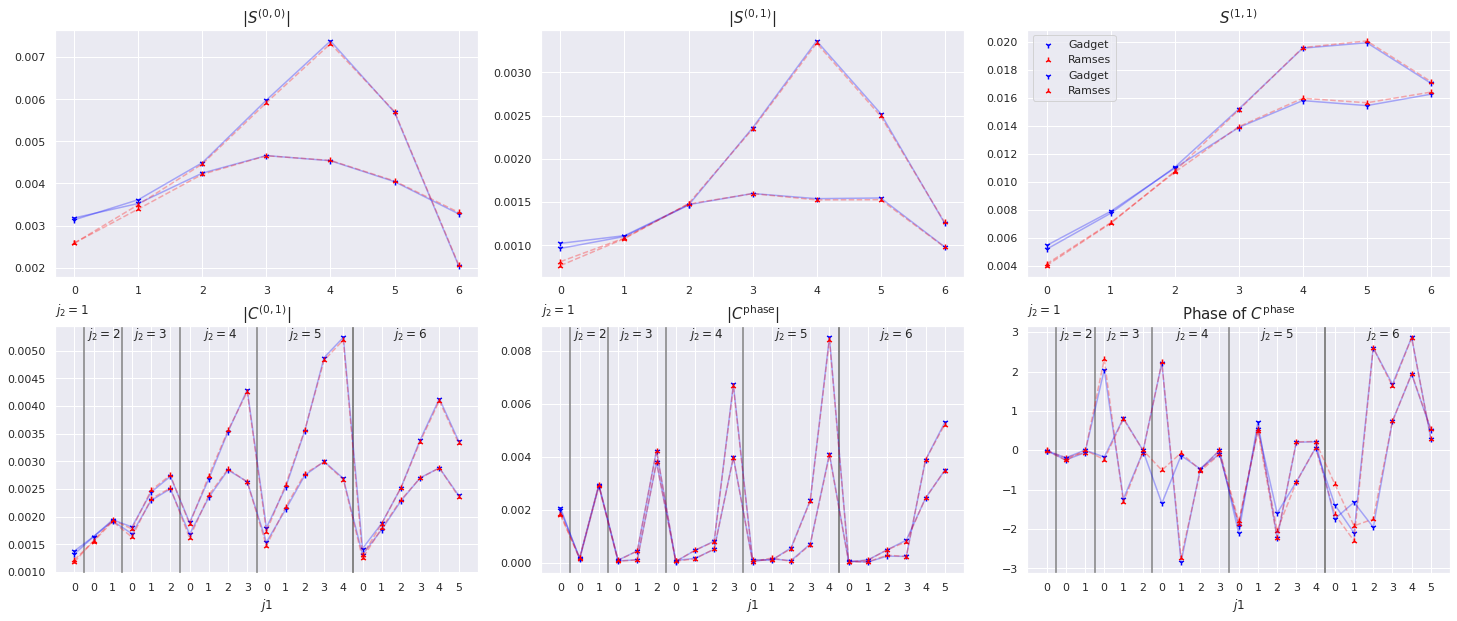

In [18]:
J = 7; L = 4; dn = 0; i = 1
wph_gadget = WPH(data=np.log(gmap[:2,:]),shape=(256, 256), J=J, L=L, dn=dn,device=0)
wph_ramses = WPH(data=np.log(rmap[:2,:]),shape=(256, 256), J=J, L=L, dn=dn,device=0)
gcoefs, gmodes = wph_gadget.getAllIsoCoeffs()
rcoefs, rmodes = wph_ramses.getAllIsoCoeffs()


axes = generateAxesForMultiplePlots(shape=(3,2),figsize=(25,10),wspace=0.15,hspace=0.2)
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif']  = 'Times'
zorder = 10; alpha=0.3
titles = ["$|S^{(0,0)}|$","$|S^{(0,1)}|$","$S^{(1,1)}$","$|C^{(0,1)}|$","$|C^\mathrm{phase}|$",]
for n in range(2):
    for i, name in enumerate(wph_gadget.getCoefNames()):
        x = i % 3; y = i // 3
        X = np.absolute(gcoefs[name][n])
        axes[x,y].plot(range(X.shape[0]),X,c="blue",ls="-",alpha=alpha,zorder=zorder)
        axes[x,y].scatter(range(X.shape[0]),X,c="blue",marker='1',zorder=zorder, label="Gadget")
        X = np.absolute(rcoefs[name][n])
        axes[x,y].plot(range(X.shape[0]),X,c="red",ls="--",alpha=alpha,zorder=zorder)
        axes[x,y].scatter(range(X.shape[0]),X,c="red",marker='2',zorder=zorder, label="Ramses")
        axes[x,y].set_title(titles[i], fontsize=15)
    axes[2,0].legend()
    ## Phase (angle of complex)
    x=2;y=1;
    X = np.angle(gcoefs[name][n])
    axes[x,y].plot(range(X.shape[0]),X,c="blue",ls="-",alpha=alpha,zorder=zorder)
    axes[x,y].scatter(range(X.shape[0]),X,c="blue",marker='1',zorder=zorder)
    X = np.angle(rcoefs[name][n])
    axes[x,y].plot(range(X.shape[0]),X,c="red",ls="--",alpha=alpha,zorder=zorder)
    axes[x,y].scatter(range(X.shape[0]),X,c="red",marker='2',zorder=zorder)
    axes[x,y].set_title("Phase of $C^\mathrm{phase}$", fontsize=15)

for i in range(3):
    #j1  = [-0.3,5.5,10.5,14.5,17.5,19.5]
    j1  = [0.5, 2.5, 5.5, 9.5, 14.5,14.5]
    j2  = list(range(1,7))
    pos = [[0.0,1.1],[0.075,1.00],[0.185,1.00],
           [0.35,1.00],[0.55,1.00],[0.8,1.00]];
    for j, jj in enumerate(j1):
        axes[i,1].axvline(x=jj,c="grey",zorder=1)
        axes[i,1].text(*pos[j],"$j_2=${}".format(j2[j]),transform=axes[i,1].transAxes,
                       verticalalignment='top', horizontalalignment='left')
    axes[i,1].set_xticks(list(range(X.shape[0])))
    axes[i,1].set_xticklabels([0,0,1,0,1,2,0,1,2,3,0,1,2,3,4,0,1,2,3,4,5])
    axes[i,1].set_xlabel("$j1$")   

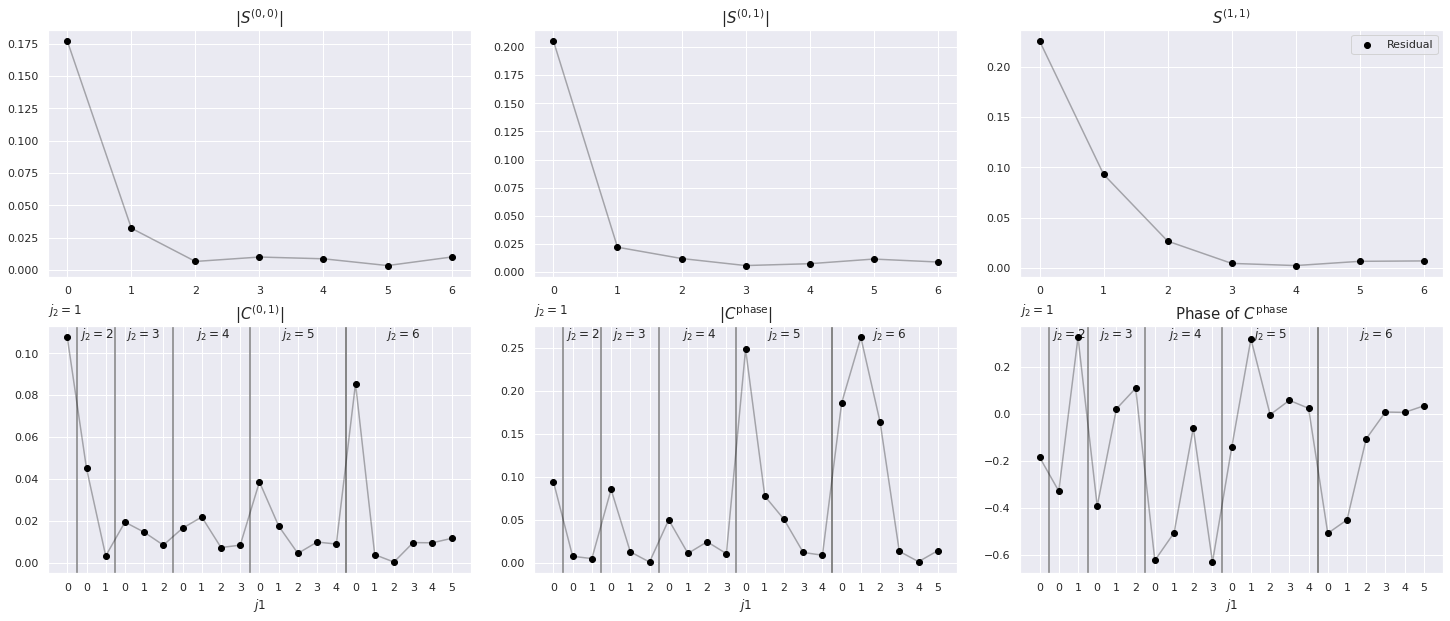

In [50]:
J = 7; L = 4; dn = 0; i = 1
wph_gadget = WPH(data=np.log(gmap[i,:]),shape=(256, 256), J=J, L=L, dn=dn,device=0)
wph_ramses = WPH(data=np.log(rmap[i,:]),shape=(256, 256), J=J, L=L, dn=dn,device=0)
gcoefs, gmodes = wph_gadget.getAllIsoCoeffs()
rcoefs, rmodes = wph_ramses.getAllIsoCoeffs()


axes = generateAxesForMultiplePlots(shape=(3,2),figsize=(25,10),wspace=0.15,hspace=0.2)
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif']  = 'Times'
zorder = 10; alpha=0.3
titles = ["$|S^{(0,0)}|$","$|S^{(0,1)}|$","$S^{(1,1)}$","$|C^{(0,1)}|$","$|C^\mathrm{phase}|$",]
for i, name in enumerate(wph_gadget.getCoefNames()):
    x = i % 3; y = i // 3
    g = np.absolute(gcoefs[name]); r = np.absolute(rcoefs[name])
    X = np.abs(g-r)/g
    axes[x,y].plot(range(X.shape[0]),X,c="black",ls="-",alpha=alpha,zorder=zorder)
    axes[x,y].scatter(range(X.shape[0]),X,c="black",marker='o',zorder=zorder, label="Residual")
    axes[x,y].set_title(titles[i], fontsize=15)
axes[2,0].legend()
## Phase (angle of complex)
x=2;y=1;
g = np.angle(gcoefs[name]); r = np.angle(rcoefs[name])
X = np.abs(g-r)/g
axes[x,y].plot(range(X.shape[0]),X,c="black",ls="-",alpha=alpha,zorder=zorder)
axes[x,y].scatter(range(X.shape[0]),X,c="black",marker='o',zorder=zorder)
axes[x,y].set_title("Phase of $C^\mathrm{phase}$", fontsize=15)

for i in range(3):
    #j1  = [-0.3,5.5,10.5,14.5,17.5,19.5]
    j1  = [0.5, 2.5, 5.5, 9.5, 14.5,14.5]
    j2  = list(range(1,7))
    pos = [[0.0,1.1],[0.075,1.00],[0.185,1.00],
           [0.35,1.00],[0.55,1.00],[0.8,1.00]];
    for j, jj in enumerate(j1):
        axes[i,1].axvline(x=jj,c="grey",zorder=1)
        axes[i,1].text(*pos[j],"$j_2=${}".format(j2[j]),transform=axes[i,1].transAxes,
                       verticalalignment='top', horizontalalignment='left')
    axes[i,1].set_xticks(list(range(X.shape[0])))
    axes[i,1].set_xticklabels([0,0,1,0,1,2,0,1,2,3,0,1,2,3,4,0,1,2,3,4,5])
    axes[i,1].set_xlabel("$j1$")   

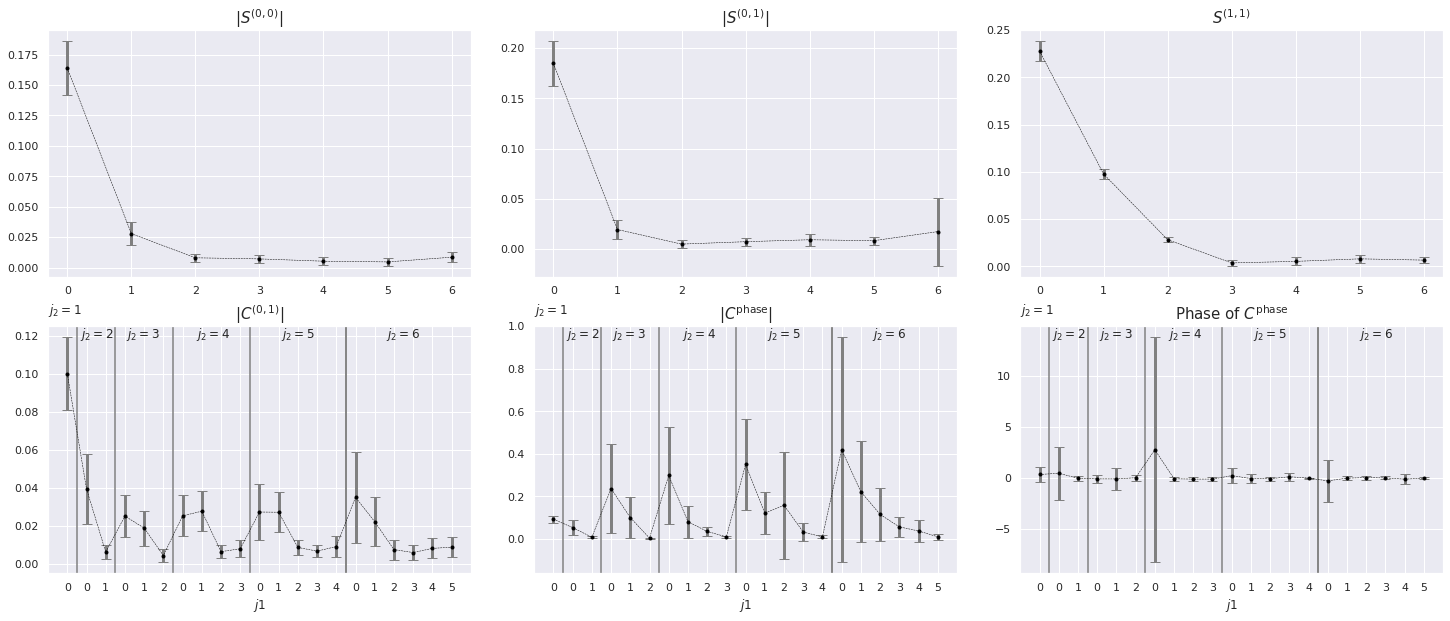

In [33]:
J = 7; L = 4; dn = 0; i = 1
wph_gadget = WPH(data=np.log(gmap[:15,:]),shape=(256, 256), J=J, L=L, dn=dn,device=0)
wph_ramses = WPH(data=np.log(rmap[:15,:]),shape=(256, 256), J=J, L=L, dn=dn,device=0)
gcoefs, gmodes = wph_gadget.getAllIsoCoeffs()
rcoefs, rmodes = wph_ramses.getAllIsoCoeffs()


axes = generateAxesForMultiplePlots(shape=(3,2),figsize=(25,10),wspace=0.15,hspace=0.2)
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif']  = 'Times'
zorder = 10; alpha=0.3
titles = ["$|S^{(0,0)}|$","$|S^{(0,1)}|$","$S^{(1,1)}$","$|C^{(0,1)}|$","$|C^\mathrm{phase}|$",]
for i, name in enumerate(wph_gadget.getCoefNames()):
    x = i % 3; y = i // 3
    g    = np.absolute(gcoefs[name]); r = np.absolute(rcoefs[name])
    X    = np.abs(g-r)/g
    mean = X.mean(axis=0)
    std  = X.std(axis=0)
    axes[x,y].errorbar(range(mean.shape[0]),mean,yerr=std, color='black',
                       ecolor='gray', ls="--", lw=0.5, elinewidth=3, capsize=5,
                       zorder=zorder,fmt='.')
    axes[x,y].set_title(titles[i], fontsize=15)
#axes[2,0].legend()
## Phase (angle of complex)
x=2;y=1;
g    = np.angle(gcoefs[name]); r = np.angle(rcoefs[name])
X    = np.abs(g-r)/g
mean = X.mean(axis=0)
std  = X.std(axis=0)
axes[x,y].errorbar(range(mean.shape[0]),mean,yerr=std, color='black',
                   ecolor='gray', ls="--", lw=0.5, elinewidth=3, capsize=5,
                   zorder=zorder,fmt='.')
axes[x,y].set_title("Phase of $C^\mathrm{phase}$", fontsize=15)

for i in range(3):
    #j1  = [-0.3,5.5,10.5,14.5,17.5,19.5]
    j1  = [0.5, 2.5, 5.5, 9.5, 14.5,14.5]
    j2  = list(range(1,7))
    pos = [[0.0,1.1],[0.075,1.00],[0.185,1.00],
           [0.35,1.00],[0.55,1.00],[0.8,1.00]];
    for j, jj in enumerate(j1):
        axes[i,1].axvline(x=jj,c="grey",zorder=1)
        axes[i,1].text(*pos[j],"$j_2=${}".format(j2[j]),transform=axes[i,1].transAxes,
                       verticalalignment='top', horizontalalignment='left')
    axes[i,1].set_xticks(list(range(mean.shape[0])))
    axes[i,1].set_xticklabels([0,0,1,0,1,2,0,1,2,3,0,1,2,3,4,0,1,2,3,4,5])
    axes[i,1].set_xlabel("$j1$")   

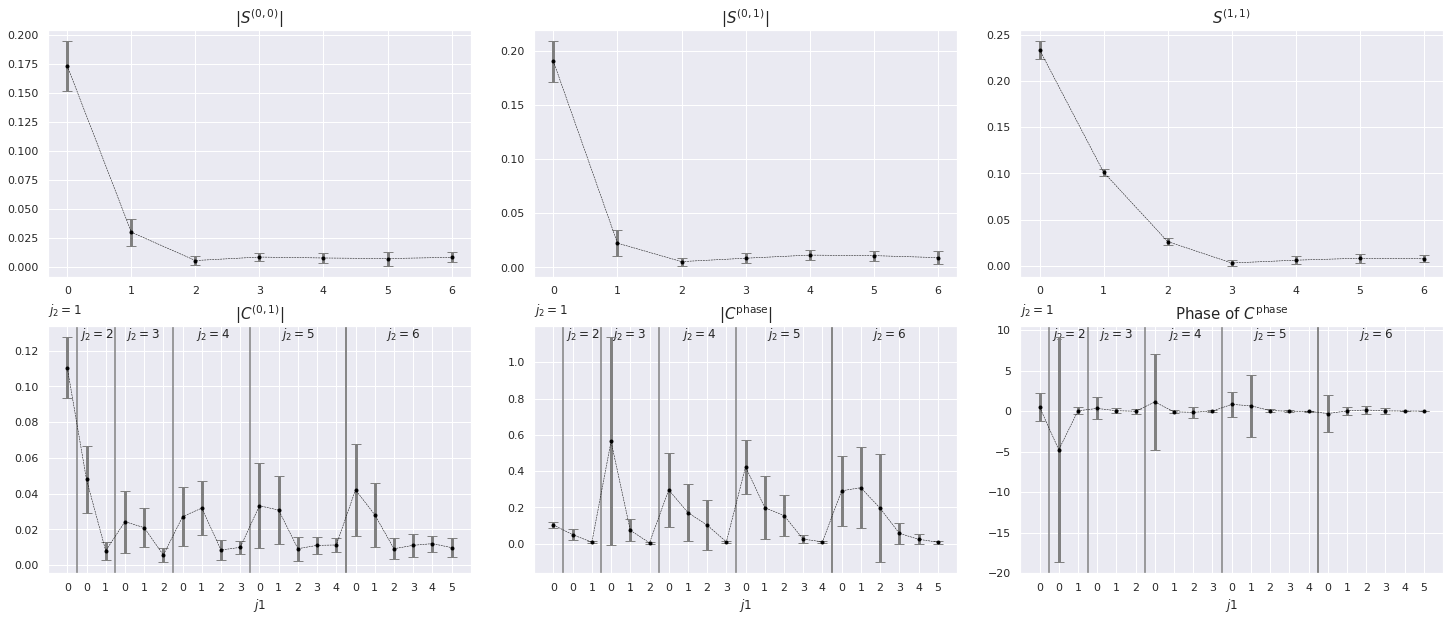

In [35]:
J = 7; L = 4; dn = 0; i = 1
wph_gadget = WPH(data=np.log(gmap[15:30,:]),shape=(256, 256), J=J, L=L, dn=dn,device=0)
wph_ramses = WPH(data=np.log(rmap[15:30,:]),shape=(256, 256), J=J, L=L, dn=dn,device=0)
gcoefs, gmodes = wph_gadget.getAllIsoCoeffs()
rcoefs, rmodes = wph_ramses.getAllIsoCoeffs()


axes = generateAxesForMultiplePlots(shape=(3,2),figsize=(25,10),wspace=0.15,hspace=0.2)
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif']  = 'Times'
zorder = 10; alpha=0.3
titles = ["$|S^{(0,0)}|$","$|S^{(0,1)}|$","$S^{(1,1)}$","$|C^{(0,1)}|$","$|C^\mathrm{phase}|$",]
for i, name in enumerate(wph_gadget.getCoefNames()):
    x = i % 3; y = i // 3
    g    = np.absolute(gcoefs[name]); r = np.absolute(rcoefs[name])
    X    = np.abs(g-r)/g
    mean = X.mean(axis=0)
    std  = X.std(axis=0)
    axes[x,y].errorbar(range(mean.shape[0]),mean,yerr=std, color='black',
                       ecolor='gray', ls="--", lw=0.5, elinewidth=3, capsize=5,
                       zorder=zorder,fmt='.')
    axes[x,y].set_title(titles[i], fontsize=15)
#axes[2,0].legend()
## Phase (angle of complex)
x=2;y=1;
g    = np.angle(gcoefs[name]); r = np.angle(rcoefs[name])
X    = np.abs(g-r)/g
mean = X.mean(axis=0)
std  = X.std(axis=0)
axes[x,y].errorbar(range(mean.shape[0]),mean,yerr=std, color='black',
                   ecolor='gray', ls="--", lw=0.5, elinewidth=3, capsize=5,
                   zorder=zorder,fmt='.')
axes[x,y].set_title("Phase of $C^\mathrm{phase}$", fontsize=15)

for i in range(3):
    #j1  = [-0.3,5.5,10.5,14.5,17.5,19.5]
    j1  = [0.5, 2.5, 5.5, 9.5, 14.5,14.5]
    j2  = list(range(1,7))
    pos = [[0.0,1.1],[0.075,1.00],[0.185,1.00],
           [0.35,1.00],[0.55,1.00],[0.8,1.00]];
    for j, jj in enumerate(j1):
        axes[i,1].axvline(x=jj,c="grey",zorder=1)
        axes[i,1].text(*pos[j],"$j_2=${}".format(j2[j]),transform=axes[i,1].transAxes,
                       verticalalignment='top', horizontalalignment='left')
    axes[i,1].set_xticks(list(range(mean.shape[0])))
    axes[i,1].set_xticklabels([0,0,1,0,1,2,0,1,2,3,0,1,2,3,4,0,1,2,3,4,5])
    axes[i,1].set_xlabel("$j1$")   

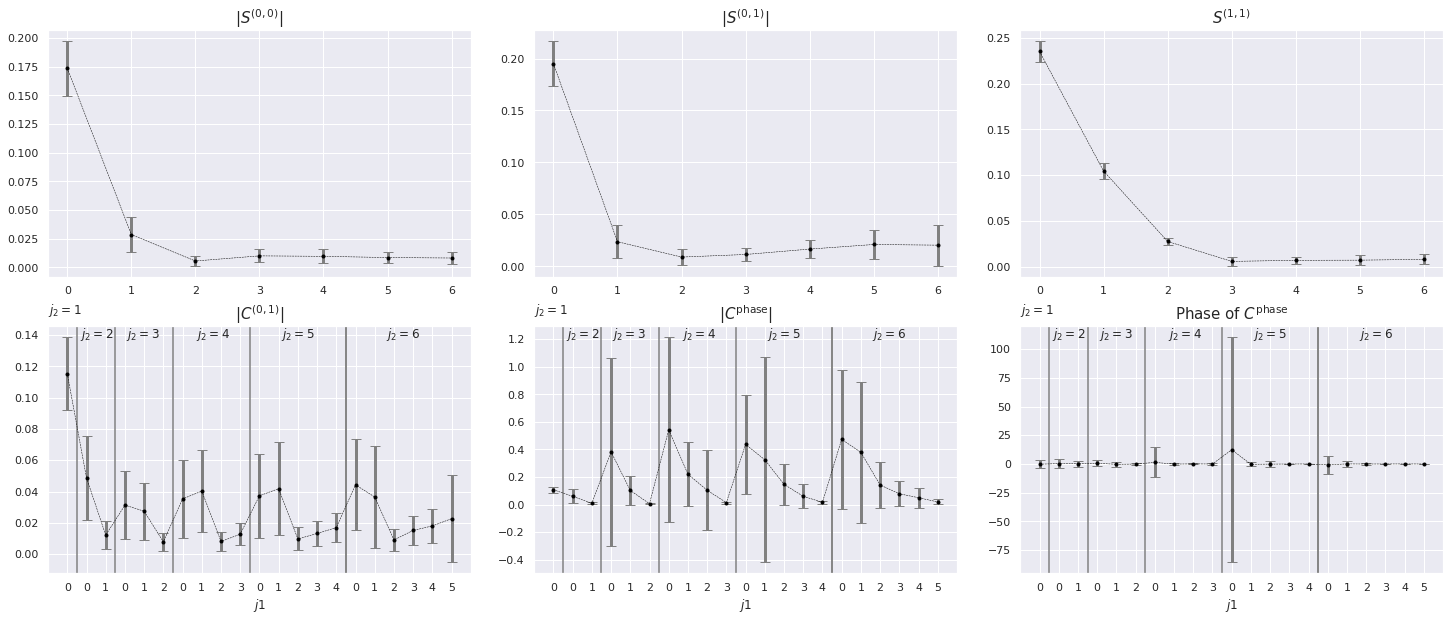

In [37]:
J = 7; L = 4; dn = 0; i = 1
wph_gadget = WPH(data=np.log(gmap[0:1000:15,:]),shape=(256, 256), J=J, L=L, dn=dn,device=0)
wph_ramses = WPH(data=np.log(rmap[0:1000:15,:]),shape=(256, 256), J=J, L=L, dn=dn,device=0)
gcoefs, gmodes = wph_gadget.getAllIsoCoeffs()
rcoefs, rmodes = wph_ramses.getAllIsoCoeffs()


axes = generateAxesForMultiplePlots(shape=(3,2),figsize=(25,10),wspace=0.15,hspace=0.2)
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif']  = 'Times'
zorder = 10; alpha=0.3
titles = ["$|S^{(0,0)}|$","$|S^{(0,1)}|$","$S^{(1,1)}$","$|C^{(0,1)}|$","$|C^\mathrm{phase}|$",]
for i, name in enumerate(wph_gadget.getCoefNames()):
    x = i % 3; y = i // 3
    g    = np.absolute(gcoefs[name]); r = np.absolute(rcoefs[name])
    X    = np.abs(g-r)/g
    mean = X.mean(axis=0)
    std  = X.std(axis=0)
    axes[x,y].errorbar(range(mean.shape[0]),mean,yerr=std, color='black',
                       ecolor='gray', ls="--", lw=0.5, elinewidth=3, capsize=5,
                       zorder=zorder,fmt='.')
    axes[x,y].set_title(titles[i], fontsize=15)
#axes[2,0].legend()
## Phase (angle of complex)
x=2;y=1;
g    = np.angle(gcoefs[name]); r = np.angle(rcoefs[name])
X    = np.abs(g-r)/g
mean = X.mean(axis=0)
std  = X.std(axis=0)
axes[x,y].errorbar(range(mean.shape[0]),mean,yerr=std, color='black',
                   ecolor='gray', ls="--", lw=0.5, elinewidth=3, capsize=5,
                   zorder=zorder,fmt='.')
axes[x,y].set_title("Phase of $C^\mathrm{phase}$", fontsize=15)

for i in range(3):
    #j1  = [-0.3,5.5,10.5,14.5,17.5,19.5]
    j1  = [0.5, 2.5, 5.5, 9.5, 14.5,14.5]
    j2  = list(range(1,7))
    pos = [[0.0,1.1],[0.075,1.00],[0.185,1.00],
           [0.35,1.00],[0.55,1.00],[0.8,1.00]];
    for j, jj in enumerate(j1):
        axes[i,1].axvline(x=jj,c="grey",zorder=1)
        axes[i,1].text(*pos[j],"$j_2=${}".format(j2[j]),transform=axes[i,1].transAxes,
                       verticalalignment='top', horizontalalignment='left')
    axes[i,1].set_xticks(list(range(mean.shape[0])))
    axes[i,1].set_xticklabels([0,0,1,0,1,2,0,1,2,3,0,1,2,3,4,0,1,2,3,4,5])
    axes[i,1].set_xlabel("$j1$")   

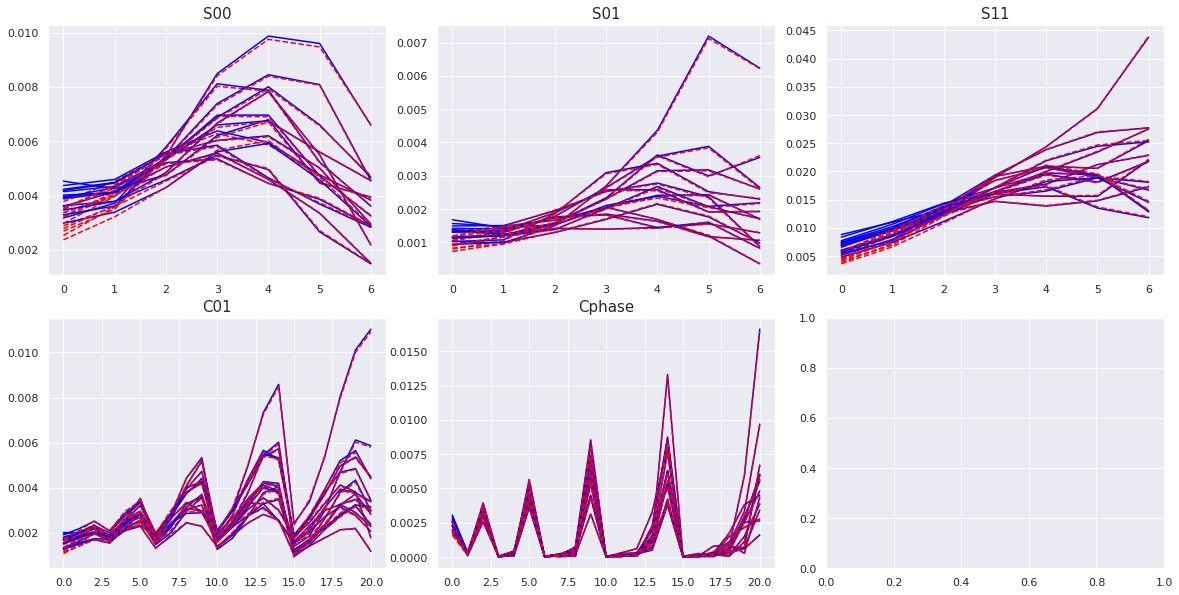

In [62]:
J = 7; L = 4; dn = 0; i = 1
wph_gadget = WPH(data=np.log(gmap[i,:]),shape=(256, 256), J=J, L=L, dn=dn,device=0)
wph_ramses = WPH(data=np.log(rmap[i,:]),shape=(256, 256), J=J, L=L, dn=dn,device=0)
gcoefs, gmodes = wph_gadget.getAllIsoCoeffs()
rcoefs, rmodes = wph_ramses.getAllIsoCoeffs()


axes = generateAxesForMultiplePlots(shape=(3,2),figsize=(25,10),wspace=0.15,hspace=0.2)
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif']  = 'Times'
zorder = 10; alpha=0.3
titles = ["$|S^{(0,0)}|$","$|S^{(0,1)}|$","$S^{(1,1)}$","$|C^{(0,1)}|$","$|C^\mathrm{phase}|$",]
for i, name in enumerate(wph_gadget.getCoefNames()):
    x = i % 3; y = i // 3
    g = np.absolute(gcoefs[name]); r = np.absolute(rcoefs[name])
    X = np.abs(g-r)/g
    axes[x,y].plot(range(X.shape[0]),X,c="black",ls="-",alpha=alpha,zorder=zorder)
    axes[x,y].scatter(range(X.shape[0]),X,c="black",marker='o',zorder=zorder, label="Residual")
    axes[x,y].set_title(titles[i], fontsize=15)
axes[2,0].legend()
## Phase (angle of complex)
x=2;y=1;
g = np.angle(gcoefs[name]); r = np.angle(rcoefs[name])
X = np.abs(g-r)/g
axes[x,y].plot(range(X.shape[0]),X,c="blue",ls="-",alpha=alpha,zorder=zorder)
axes[x,y].scatter(range(X.shape[0]),X,c="blue",marker='1',zorder=zorder)
axes[x,y].set_title("Phase of $C^\mathrm{phase}$", fontsize=15)

for i in range(3):
    #j1  = [-0.3,5.5,10.5,14.5,17.5,19.5]
    j1  = [0.5, 2.5, 5.5, 9.5, 14.5,14.5]
    j2  = list(range(1,7))
    pos = [[0.0,1.1],[0.075,1.00],[0.185,1.00],
           [0.35,1.00],[0.55,1.00],[0.8,1.00]];
    for j, jj in enumerate(j1):
        axes[i,1].axvline(x=jj,c="grey",zorder=1)
        axes[i,1].text(*pos[j],"$j_2=${}".format(j2[j]),transform=axes[i,1].transAxes,
                       verticalalignment='top', horizontalalignment='left')
    axes[i,1].set_xticks(list(range(X.shape[0])))
    axes[i,1].set_xticklabels([0,0,1,0,1,2,0,1,2,3,0,1,2,3,4,0,1,2,3,4,5])
    axes[i,1].set_xlabel("$j1$")   

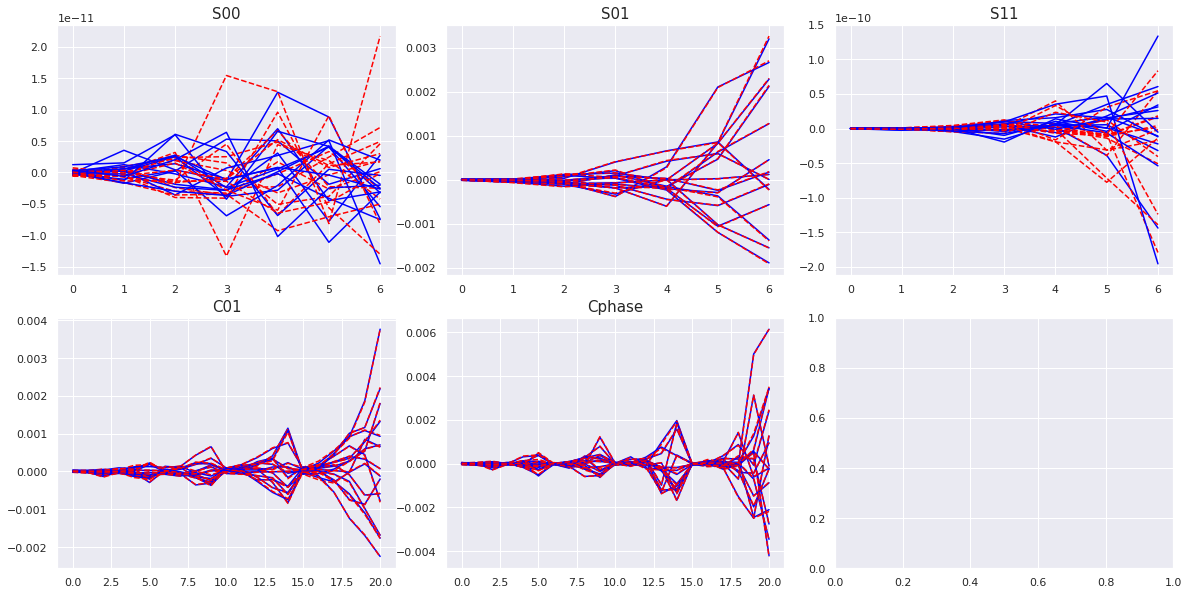

In [30]:
J = 7; L = 4; dn = 0
axes = generateAxesForMultiplePlots(shape=(3,2),figsize=(20,10),wspace=0.15,hspace=0.17)

for j in range(15):
    wph_gadget = WPH(data=np.log(gmap[j+15,:]),shape=(256, 256), J=J, L=L, dn=dn,device=0)
    wph_ramses = WPH(data=np.log(rmap[j+15,:]),shape=(256, 256), J=J, L=L, dn=dn,device=0)
    gcoefs, gmodes = wph_gadget.getAllIsoCoeffs()
    rcoefs, rmodes = wph_ramses.getAllIsoCoeffs()

    for i, name in enumerate(wph_gadget.getCoefNames()):
        x = i % 3; y = i // 3
        X = np.imag(gcoefs[name])
        axes[x,y].plot(range(X.shape[0]),X,c="blue",ls="-")
        X = np.imag(rcoefs[name])
        axes[x,y].plot(range(X.shape[0]),X,c="red",ls="--")
        axes[x,y].set_title(name, fontsize=15)


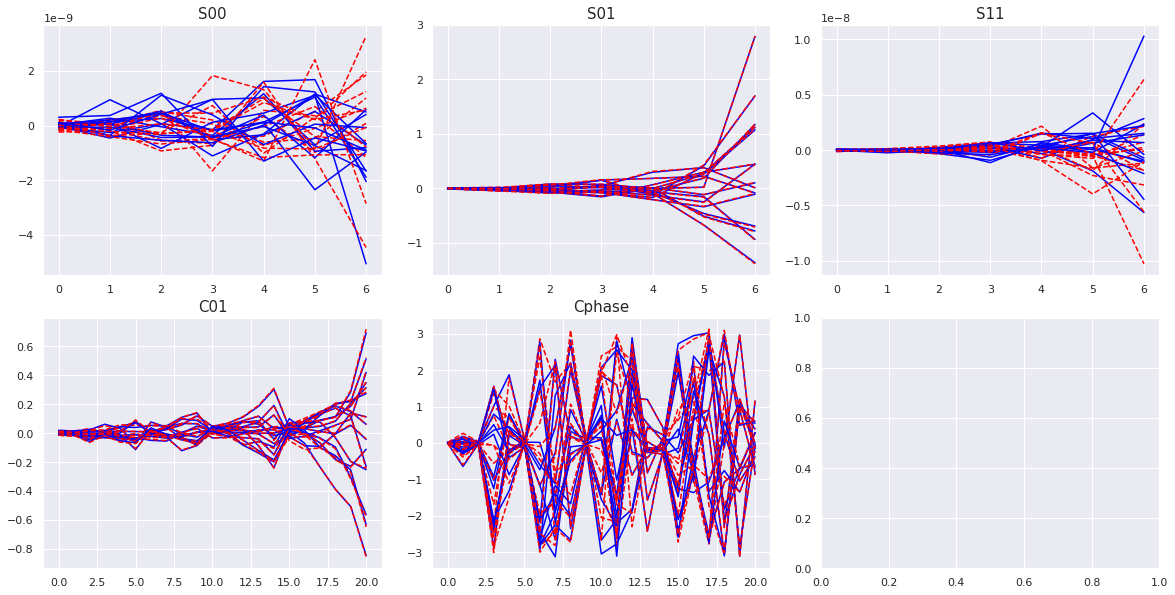

In [64]:
J = 7; L = 4; dn = 0
axes = generateAxesForMultiplePlots(shape=(3,2),figsize=(20,10),wspace=0.15,hspace=0.17)

for j in range(15):
    wph_gadget = WPH(data=np.log(gmap[j+15,:]),shape=(256, 256), J=J, L=L, dn=dn,device=0)
    wph_ramses = WPH(data=np.log(rmap[j+15,:]),shape=(256, 256), J=J, L=L, dn=dn,device=0)
    gcoefs, gmodes = wph_gadget.getAllIsoCoeffs()
    rcoefs, rmodes = wph_ramses.getAllIsoCoeffs()

    for i, name in enumerate(wph_gadget.getCoefNames()):
        x = i % 3; y = i // 3
        X = np.angle(gcoefs[name])
        axes[x,y].plot(range(X.shape[0]),X,c="blue",ls="-")
        X = np.angle(rcoefs[name])
        axes[x,y].plot(range(X.shape[0]),X,c="red",ls="--")
        axes[x,y].set_title(name, fontsize=15)


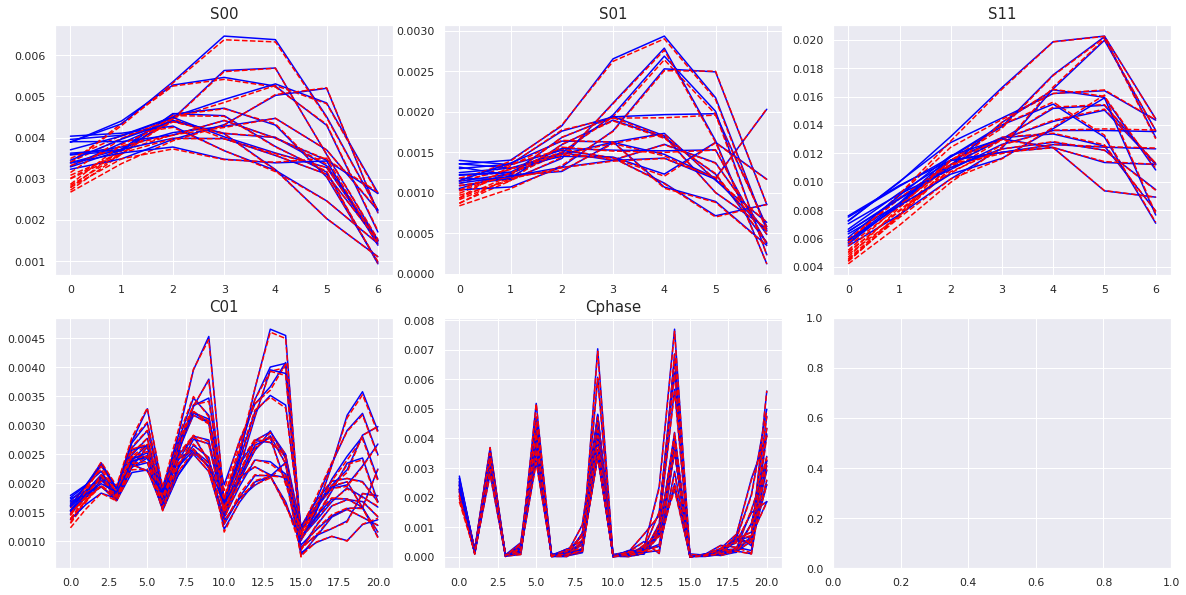

In [59]:
J = 7; L = 4; dn = 0
axes = generateAxesForMultiplePlots(shape=(3,2),figsize=(20,10),wspace=0.15,hspace=0.17)

for j in range(15):
    wph_gadget = WPH(data=np.log(gmap[j+75,:]),shape=(256, 256), J=J, L=L, dn=dn,device=0)
    wph_ramses = WPH(data=np.log(rmap[j+75,:]),shape=(256, 256), J=J, L=L, dn=dn,device=0)
    gcoefs, gmodes = wph_gadget.getAllIsoCoeffs()
    rcoefs, rmodes = wph_ramses.getAllIsoCoeffs()

    for i, name in enumerate(wph_gadget.getCoefNames()):
        x = i % 3; y = i // 3
        X = np.absolute(gcoefs[name])
        axes[x,y].plot(range(X.shape[0]),X,c="blue",ls="-")
        X = np.absolute(rcoefs[name])
        axes[x,y].plot(range(X.shape[0]),X,c="red",ls="--")
        axes[x,y].set_title(name, fontsize=15)


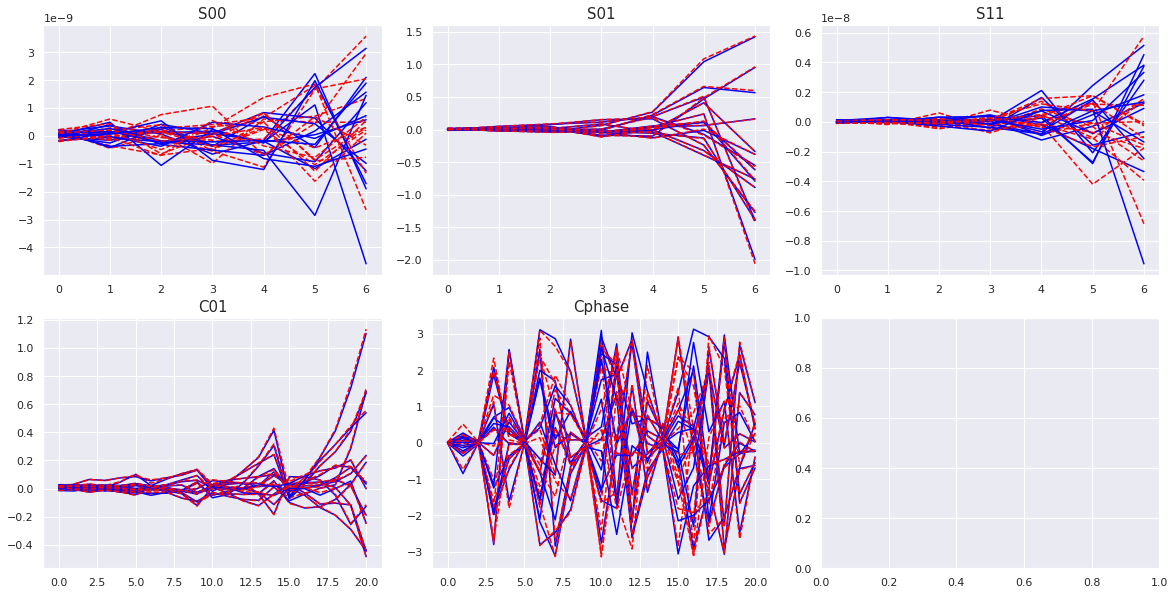

In [63]:
J = 7; L = 4; dn = 0
axes = generateAxesForMultiplePlots(shape=(3,2),figsize=(20,10),wspace=0.15,hspace=0.17)

for j in range(15):
    wph_gadget = WPH(data=np.log(gmap[j+75,:]),shape=(256, 256), J=J, L=L, dn=dn,device=0)
    wph_ramses = WPH(data=np.log(rmap[j+75,:]),shape=(256, 256), J=J, L=L, dn=dn,device=0)
    gcoefs, gmodes = wph_gadget.getAllIsoCoeffs()
    rcoefs, rmodes = wph_ramses.getAllIsoCoeffs()

    for i, name in enumerate(wph_gadget.getCoefNames()):
        x = i % 3; y = i // 3
        X = np.angle(gcoefs[name])
        axes[x,y].plot(range(X.shape[0]),X,c="blue",ls="-")
        X = np.angle(rcoefs[name])
        axes[x,y].plot(range(X.shape[0]),X,c="red",ls="--")
        axes[x,y].set_title(name, fontsize=15)
